In [1]:
from neuralnet import *
from dataloader import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# prepare small data
c = load_config('config.yaml')
d = DataLoader() # data loader does everything for u




X = d.X_train
y = d.y_train


X_val = d.X_val
y_val = d.y_val

# ind=np.random.randint(low =0, high = d.X_train.shape[0], size = 500)
# X = d.X_train[ind, :]
# y = d.y_train[ind]
# ind=np.random.randint(low =0, high = 5000, size = 30)
# X_val = d.X_val[ind, :]
# y_val = d.y_val[ind]





In [2]:
test_dict = {} # to record test performance

In [3]:
# without reg
c['learning_rate'] = 0.5
nn =  Neuralnetwork(c)
#nn.batch_size = 50 # small batch size will not yeild nan
tloss, vloss, tacc, vacc = train(nn, X, y, X_val,y_val,c)

epoch0, val=0.17, train_acc=0.1502
epoch20, val=0.275, train_acc=0.3254888888888889
epoch40, val=0.2812, train_acc=0.34702222222222223
epoch60, val=0.288, train_acc=0.36075555555555555
epoch80, val=0.2838, train_acc=0.37248888888888887


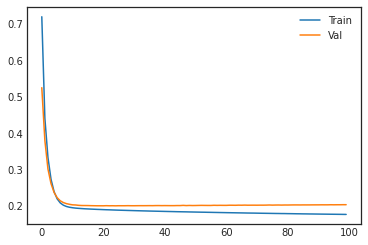

In [4]:
plt.plot(np.array(tloss), label = 'Train')
plt.plot(np.array(vloss), label = 'Val')
plt.legend()

plt.savefig('Loss_curve_L2_0.png')

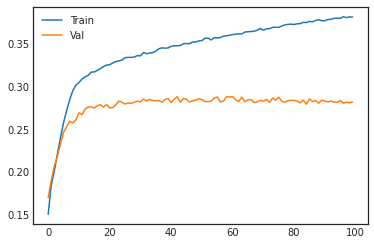

In [5]:
plt.plot(np.array(tacc), label = 'Train')
plt.plot(np.array(vacc), label = 'Val')
plt.legend()
plt.savefig('Acc_curve_L2_0.png')

In [6]:
import pandas as pd
performance = pd.DataFrame([tloss, vloss, tacc, vacc], index = ['train_loss', 'val_loss', 'train_acc', 'vacc']).T
performance.to_csv('Acc_curve_L2_0.csv')

In [7]:
test_dict[0]=test(nn, d.X_test, d.y_test)

In [8]:
# make reg
import copy
regularized_config = c.copy()
regularized_config['L2_penalty']=0.1

In [9]:
# without reg
nn =  Neuralnetwork(regularized_config)

tloss, vloss, tacc, vacc = train(nn, X, y, X_val,y_val,c)

epoch0, val=0.1, train_acc=0.10266666666666667
early_stopped at epoch 6


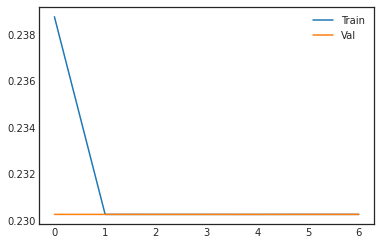

In [10]:
plt.plot(np.array(tloss), label = 'Train')
plt.plot(np.array(vloss), label = 'Val')
plt.legend()

epoch0, val=0.1702, train_acc=0.1534222222222222
epoch20, val=0.3474, train_acc=0.3682
epoch40, val=0.4252, train_acc=0.48088888888888887
epoch60, val=0.4532, train_acc=0.5424444444444444
epoch80, val=0.4458, train_acc=0.5674444444444444


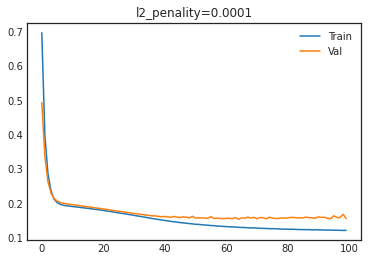

epoch0, val=0.1968, train_acc=0.1606
epoch20, val=0.385, train_acc=0.38893333333333335
epoch40, val=0.3752, train_acc=0.39137777777777777
epoch60, val=0.3868, train_acc=0.3897111111111111
epoch80, val=0.389, train_acc=0.39211111111111113
epoch100, val=0.391, train_acc=0.39222222222222225
epoch120, val=0.3882, train_acc=0.39197777777777776
epoch140, val=0.384, train_acc=0.39153333333333334


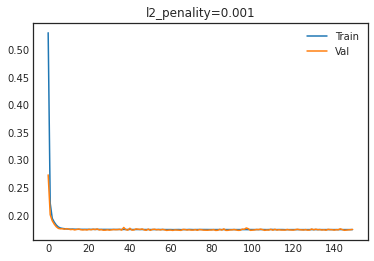

epoch0, val=0.173, train_acc=0.1984
early_stopped at epoch 9


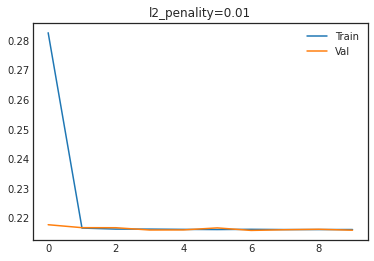

epoch0, val=0.1, train_acc=0.10266666666666667
early_stopped at epoch 6


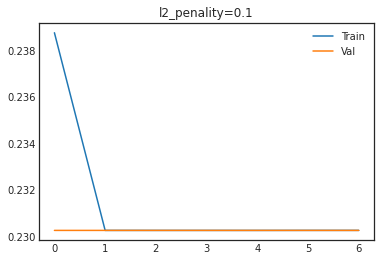

epoch0, val=0.0668, train_acc=0.09964444444444444
epoch20, val=0.0786, train_acc=0.09957777777777778
epoch40, val=0.0688, train_acc=0.09404444444444444
epoch60, val=0.0996, train_acc=0.09984444444444444
epoch80, val=0.0998, train_acc=0.09984444444444444
early_stopped at epoch 83


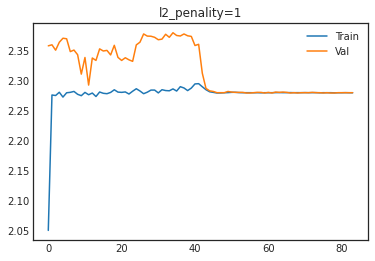

In [11]:
# try different regularization

for l2_pen in [10**(-4), 10**(-3), 10**(-2), 10**(-1), 1]:
    regularized_config = c.copy()
    c['epochs'] = 150
    regularized_config['L2_penalty']=l2_pen
    
    nn =  Neuralnetwork(regularized_config)
    #nn.batch_size = 50 # small batch size will not yeild nan
    tloss, vloss, tacc, vacc = train(nn, X, y, X_val,y_val,c)
    
    # plot curve
    plt.plot(np.array(tloss), label = 'Train')
    plt.plot(np.array(vloss), label = 'Val')
    plt.legend()
    plt.title(f'l2_penality={l2_pen}')
    plt.savefig(f'Loss_curve_L2_{l2_pen}.png')
    plt.show()
    
    # save performance
    performance = pd.DataFrame([tloss, vloss, tacc, vacc], index = ['train_loss', 'val_loss', 'train_acc', 'vacc']).T
    performance.to_csv(f'Acc_curve_L2_{l2_pen}.csv')
    
    # save test performance
    test_dict[l2_pen]=test(nn, d.X_test, d.y_test)

In [12]:
test_performance = pd.DataFrame.from_dict(test_dict, orient = 'index')
test_performance.reset_index(inplace = True)
test_performance.columns = ['L2 penalty','Test accuracy']
test_performance

,L2 penalty,Test accuracy
0,0.0000,0.2761
1,0.0001,0.4516
2,0.0010,0.3830
3,0.0100,0.1684
4,0.1000,0.1000
5,1.0000,0.0995


In [13]:
print(test_performance.to_latex())

\begin{tabular}{lrr}
\toprule
{} &  L2 penalty &  Test accuracy \\
\midrule
0 &      0.0000 &         0.2761 \\
1 &      0.0001 &         0.4516 \\
2 &      0.0010 &         0.3830 \\
3 &      0.0100 &         0.1684 \\
4 &      0.1000 &         0.1000 \\
5 &      1.0000 &         0.0995 \\
\bottomrule
\end{tabular}

